# Problem Statement : Loan Approval Prediction 

# Validates the customer eligibility for loan or not

## Importing Required Packages

In [1]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import pickle
import os
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv("final-loan.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Exploratory Data Analysis

In [52]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128835 entries, 0 to 128834
Data columns (total 13 columns):
Loan_ID              128835 non-null object
Gender               126108 non-null object
Married              128205 non-null object
Dependents           125688 non-null object
Education            128835 non-null object
Self_Employed        122120 non-null object
ApplicantIncome      128835 non-null int64
CoapplicantIncome    128835 non-null float64
LoanAmount           124219 non-null float64
Loan_Amount_Term     125895 non-null float64
Credit_History       118342 non-null float64
Property_Area        128835 non-null object
Loan_Status          128835 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 12.8+ MB


In [5]:
df["Loan_Status"].value_counts()

Y    88550
N    40285
Name: Loan_Status, dtype: int64

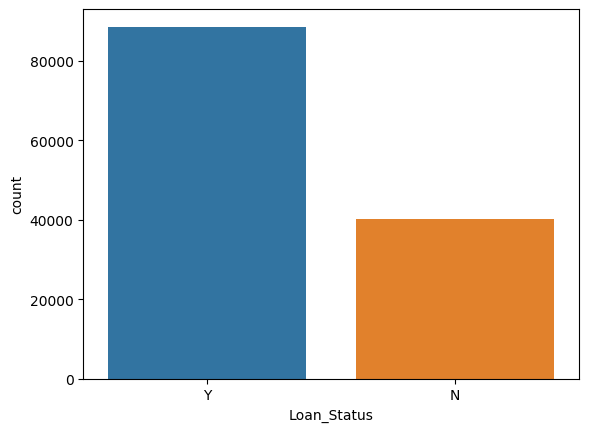

In [6]:
sns.countplot(df["Loan_Status"])

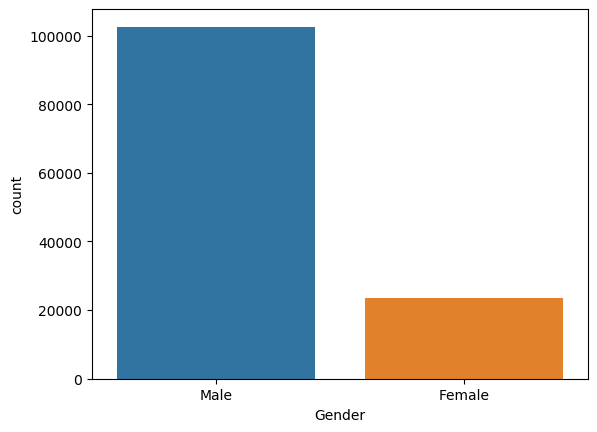

In [7]:
sns.countplot(df["Gender"])

In [8]:
df.isnull().sum()

Loan_ID                  0
Gender                2727
Married                630
Dependents            3147
Education                0
Self_Employed         6715
ApplicantIncome          0
CoapplicantIncome        0
LoanAmount            4616
Loan_Amount_Term      2940
Credit_History       10493
Property_Area            0
Loan_Status              0
dtype: int64

## Missing value Analysis

In [9]:
#To check the no.of missing value features with percentage
feature_missing_val = [feature for feature in df.columns if df[feature].isnull().sum() > 1]
feature_missing_val

for feature in feature_missing_val:
    print(feature, np.around(df[feature].isnull().mean(),4)*100)

Gender 2.12
Married 0.49
Dependents 2.44
Self_Employed 5.21
LoanAmount 3.58
Loan_Amount_Term 2.2800000000000002
Credit_History 8.14


In [10]:
(df.isnull().sum()/len(df))*100

Loan_ID              0.000000
Gender               2.116661
Married              0.488998
Dependents           2.442659
Education            0.000000
Self_Employed        5.212093
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.582877
Loan_Amount_Term     2.281989
Credit_History       8.144526
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

## Numerical Features

In [11]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

Number of numerical variables:  5


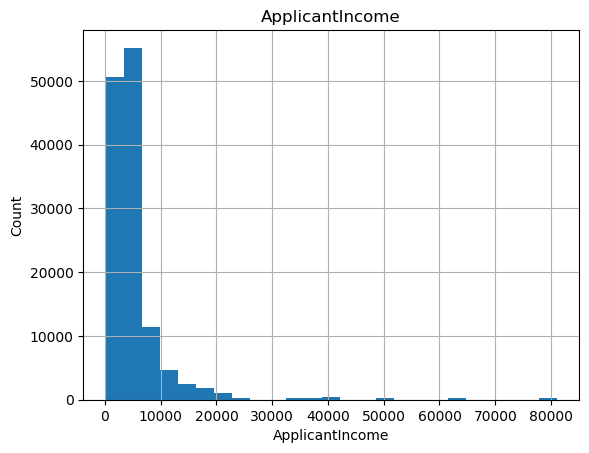

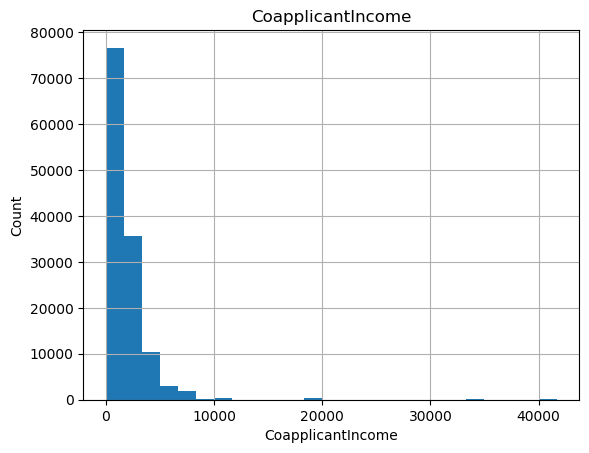

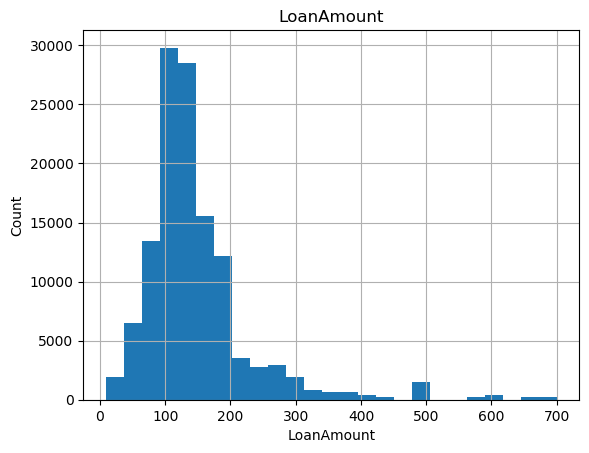

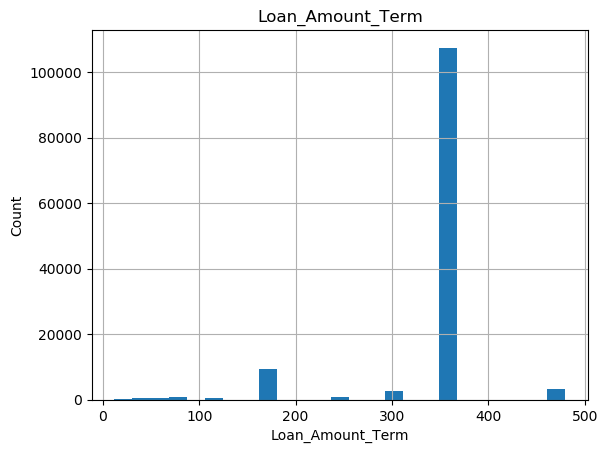

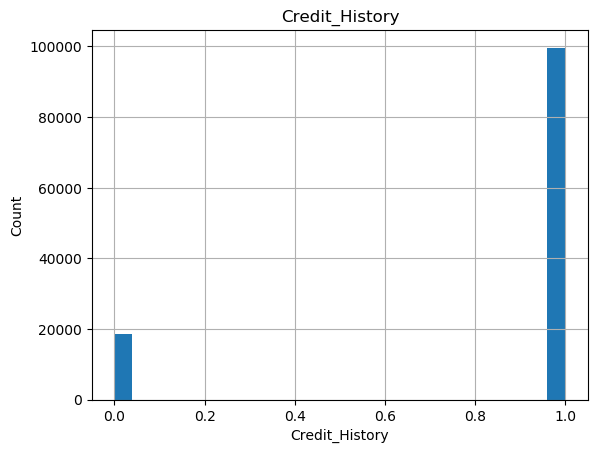

In [12]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in numerical_features:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

## Outlier Analysis

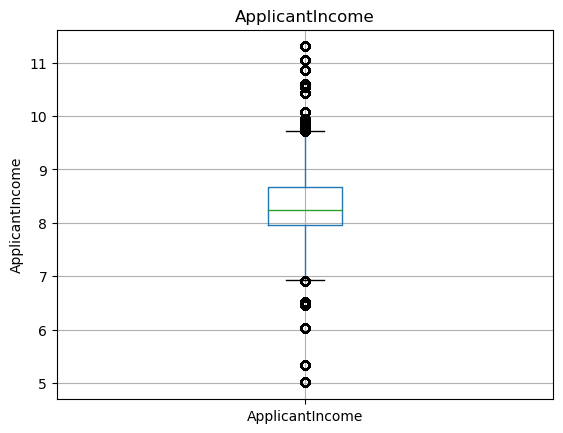

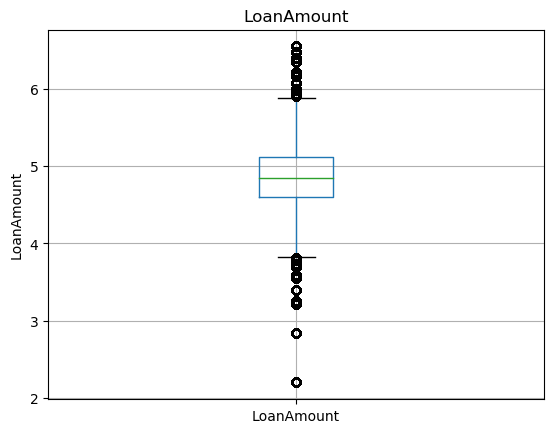

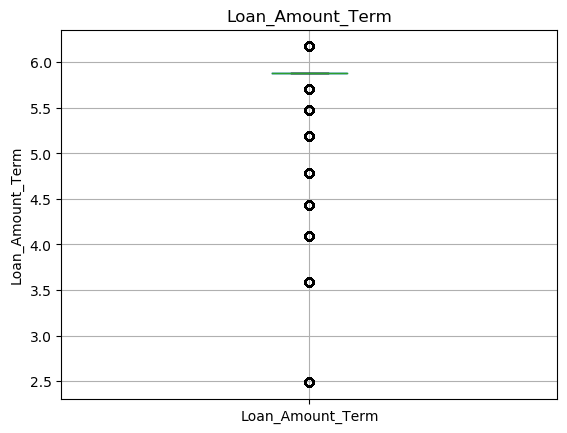

In [13]:
for feature in numerical_features:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

## Categorical Variables

In [14]:
categorical_features=[feature for feature in df.columns if data[feature].dtypes=='O']
categorical_features

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [15]:
df[categorical_features].head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [16]:
#Analysis of categories from each features
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is Loan_ID and number of categories are 128835
The feature is Gender and number of categories are 3
The feature is Married and number of categories are 3
The feature is Dependents and number of categories are 5
The feature is Education and number of categories are 2
The feature is Self_Employed and number of categories are 3
The feature is Property_Area and number of categories are 3
The feature is Loan_Status and number of categories are 2


## Data Imbalanced

In [17]:
df["Credit_History"].value_counts()

1.0    99669
0.0    18673
Name: Credit_History, dtype: int64

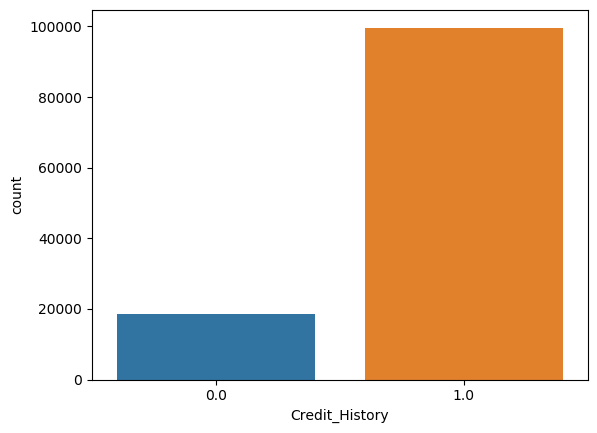

In [18]:
sns.countplot(df["Credit_History"])

# Featured Engineering

## Handle Missing values

In [19]:
#Handle missing value for categorical features
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)
df["Married"].fillna(df["Married"].mode()[0],inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0],inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0],inplace=True)
df["Dependents"].fillna(df["Dependents"].mode()[0],inplace=True)

In [20]:
#Handle missing value for Numerical features
df["LoanAmount"].fillna(df["LoanAmount"].median(),inplace=True)
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].median(),inplace=True)

## Convert categorical data into the Numeric data

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128835 entries, 0 to 128834
Data columns (total 13 columns):
Loan_ID              128835 non-null object
Gender               128835 non-null object
Married              128835 non-null object
Dependents           128835 non-null object
Education            128835 non-null object
Self_Employed        128835 non-null object
ApplicantIncome      128835 non-null int64
CoapplicantIncome    128835 non-null float64
LoanAmount           128835 non-null float64
Loan_Amount_Term     128835 non-null float64
Credit_History       128835 non-null float64
Property_Area        128835 non-null object
Loan_Status          128835 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 12.8+ MB


In [22]:
df["Gender"] = df["Gender"].map({"Male":1,"Female":0})
df["Married"] = df["Married"].map({"Yes":1,"No":0})
df["Dependents"] = df["Dependents"].map({"0":0,"1":1,"2":2,"3+":3})
df["Education"] = df["Education"].map({"Graduate":1,"Not Graduate":0})
df["Self_Employed"] = df["Self_Employed"].map({"No":0,"Yes":1})
df["Property_Area"] = df["Property_Area"].map({"Urban":0,"Semiurban":1,"Rural":3})

In [23]:
df["Loan_Status"] = df["Loan_Status"].map({"Y":1,"N":0})

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128835 entries, 0 to 128834
Data columns (total 13 columns):
Loan_ID              128835 non-null object
Gender               128835 non-null int64
Married              128835 non-null int64
Dependents           128835 non-null int64
Education            128835 non-null int64
Self_Employed        128835 non-null int64
ApplicantIncome      128835 non-null int64
CoapplicantIncome    128835 non-null float64
LoanAmount           128835 non-null float64
Loan_Amount_Term     128835 non-null float64
Credit_History       128835 non-null float64
Property_Area        128835 non-null int64
Loan_Status          128835 non-null int64
dtypes: float64(4), int64(8), object(1)
memory usage: 12.8+ MB


In [25]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364623,0.172926,-0.045376,-0.000509,0.058889,0.083139,0.107010,-0.074038,0.009182,0.047340,0.018016
Married,0.364623,1.000000,0.334223,-0.012379,0.004444,0.051700,0.076245,0.146484,-0.100929,0.010979,-0.005462,0.091437
Dependents,0.172926,0.334223,1.000000,-0.055947,0.056648,0.118180,0.030410,0.163037,-0.103921,-0.040235,-0.000169,0.010066
Education,-0.045376,-0.012379,-0.055947,1.000000,0.010362,0.140781,0.062265,0.168746,0.074047,0.073777,-0.072339,0.085929
Self_Employed,-0.000509,0.004444,0.056648,0.010362,1.000000,0.126987,-0.015970,0.114856,-0.033847,-0.001514,0.028631,-0.003703
ApplicantIncome,0.058889,0.051700,0.118180,0.140781,0.126987,1.000000,-0.116562,0.565234,-0.046635,-0.018688,0.012341,-0.004801
CoapplicantIncome,0.083139,0.076245,0.030410,0.062265,-0.015970,-0.116562,1.000000,0.189302,-0.059167,0.011050,-0.004774,-0.059005
LoanAmount,0.107010,0.146484,0.163037,0.168746,0.114856,0.565234,0.189302,1.000000,0.036927,-0.000685,0.047238,-0.033333
Loan_Amount_Term,-0.074038,-0.100929,-0.103921,0.074047,-0.033847,-0.046635,-0.059167,0.036927,1.000000,-0.004642,0.063224,-0.022710
Credit_History,0.009182,0.010979,-0.040235,0.073777,-0.001514,-0.018688,0.011050,-0.000685,-0.004642,1.000000,-0.009253,0.540533


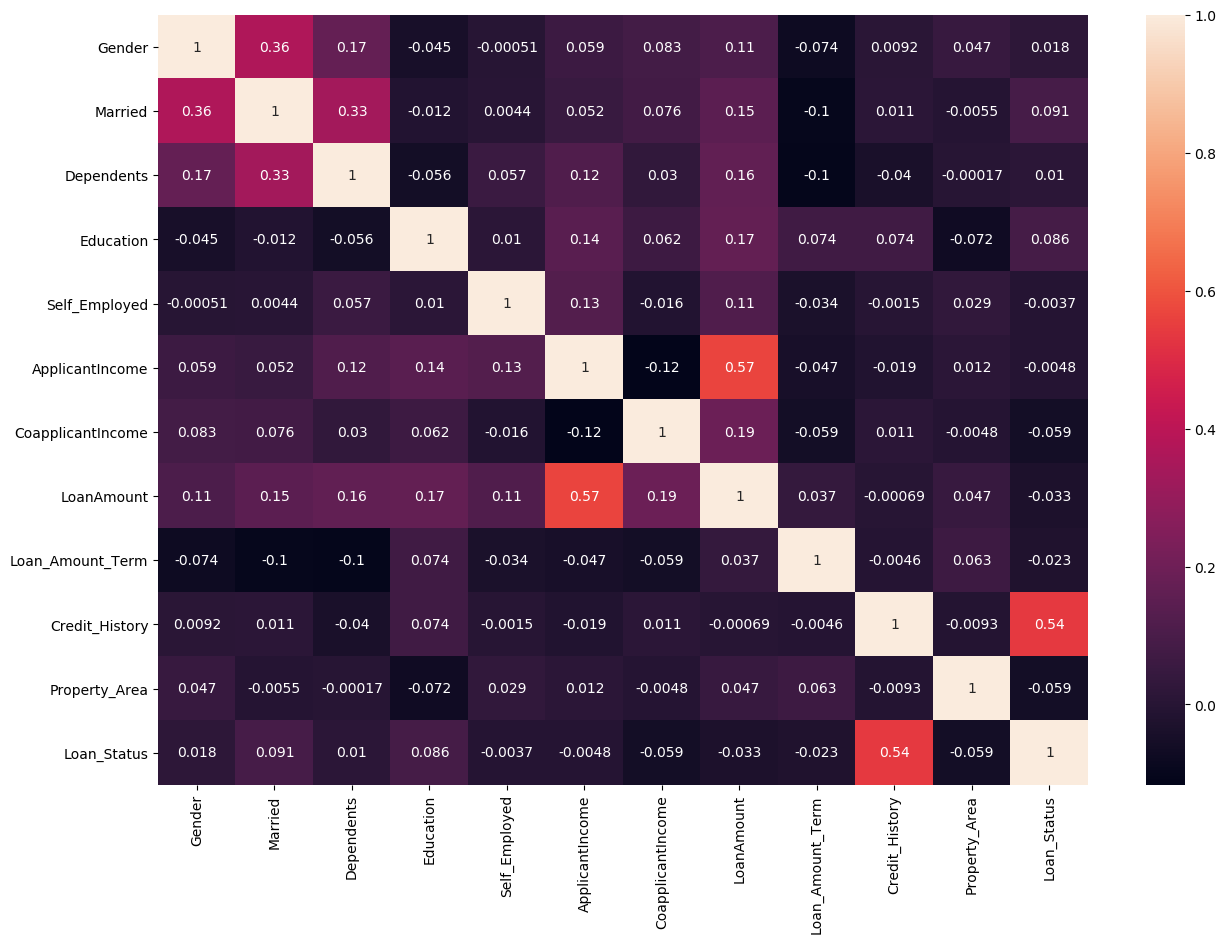

In [26]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(),annot = True)
plt.savefig('Correlation.png')

## Feature Scaling

In [27]:
feature_scale=[feature for feature in numerical_features]
scaler=MinMaxScaler()
scaler.fit(df[feature_scale])
scaler.transform(df[feature_scale])

array([[0.07048856, 0.        , 0.17221418, 0.74358974, 1.        ],
       [0.05482993, 0.03619171, 0.17221418, 0.74358974, 1.        ],
       [0.03525046, 0.        , 0.08248915, 0.74358974, 1.        ],
       ...,
       [0.25581942, 0.16000672, 0.68162084, 0.74358974, 1.        ],
       [0.04246135, 0.        , 0.12590449, 0.74358974, 1.        ],
       [0.02880643, 0.07231142, 0.25904486, 0.74358974, 1.        ]])

In [28]:
df_scale = pd.DataFrame(scaler.transform(df[feature_scale]), columns=feature_scale)
df_scale.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.070489,0.000000,0.172214,0.74359,1.0
1,0.054830,0.036192,0.172214,0.74359,1.0
2,0.035250,0.000000,0.082489,0.74359,1.0
3,0.030093,0.056592,0.160637,0.74359,1.0
4,0.072356,0.000000,0.191027,0.74359,1.0


In [29]:
# transform the train and test set, and add on the Id and SalePrice variables
data = pd.concat([df[["Loan_ID","Loan_Status"]].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df[feature_scale]), columns=feature_scale)],
                    axis=1)

In [30]:
data.head()

,Loan_ID,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,LP001002,1,0.070489,0.000000,0.172214,0.74359,1.0
1,LP001003,0,0.054830,0.036192,0.172214,0.74359,1.0
2,LP001005,1,0.035250,0.000000,0.082489,0.74359,1.0
3,LP001006,1,0.030093,0.056592,0.160637,0.74359,1.0
4,LP001008,1,0.072356,0.000000,0.191027,0.74359,1.0


In [31]:
# for i in range(df.shape[1] -1):
#     vif=variance_inflation_factor(df.to_numpy(),i)
#     print(f"vif of {df.columns[i]}: ",vif)

In [32]:
df = df.drop("Loan_ID", axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,0,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,3,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,0,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,0,1


## Split dataset into the training and testing

In [33]:
x = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3,random_state = 10, stratify = y)

In [35]:
len(x_train),len(y_train)

(90184, 90184)

In [36]:
len(x_test),len(y_test)

(38651, 38651)

## Model Training

In [37]:
class Evaluation():
    
    def __init__(self,model):
        self.model = model
    
    def train(self,x_train,y_train):
        y_train_pred = self.model.predict(x_train)
        accuracy_score_train= accuracy_score(y_train,y_train_pred)
        print("Accuracy Score : ",accuracy_score_train)
        print()

        confusion_matrix_train = confusion_matrix(y_train,y_train_pred)
        print("Confusion Matrix :\n ",confusion_matrix_train)
        print()

        classification_report_train = classification_report(y_train,y_train_pred)
        print("Classification Report :\n ",classification_report_train)
        
    def test(self,x_test,y_test):
        y_test_pred = self.model.predict(x_test)
        accuracy_score_test = accuracy_score(y_test,y_test_pred)
        print("Accuracy Score : ",accuracy_score_test)
        print()

        confusion_matrix_test= confusion_matrix(y_test,y_test_pred)
        print("Confusion Matrix :\n ",confusion_matrix_test)
        print()

        classification_report_test = classification_report(y_test,y_test_pred)
        print("Classification Report :\n ",classification_report_test)
        

### RandomForest Model Training

In [38]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### RandomForest Model Evaluation

In [39]:
rf_evaluation = Evaluation(rf_model)

In [40]:
#Accuracy test on Training dataset
rf_evaluation.train(x_train,y_train)

Accuracy Score :  1.0

Confusion Matrix :
  [[28199     0]
 [    0 61985]]

Classification Report :
                precision    recall  f1-score   support

           0       1.00      1.00      1.00     28199
           1       1.00      1.00      1.00     61985

    accuracy                           1.00     90184
   macro avg       1.00      1.00      1.00     90184
weighted avg       1.00      1.00      1.00     90184



In [41]:
#Accuracy test on Testing dataset
rf_evaluation.test(x_test,y_test)

Accuracy Score :  1.0

Confusion Matrix :
  [[12086     0]
 [    0 26565]]

Classification Report :
                precision    recall  f1-score   support

           0       1.00      1.00      1.00     12086
           1       1.00      1.00      1.00     26565

    accuracy                           1.00     38651
   macro avg       1.00      1.00      1.00     38651
weighted avg       1.00      1.00      1.00     38651



### Logistic Regression Model Training

In [42]:
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Logistic Regression Model Evaluation

In [43]:
lr_evaluation = Evaluation(lr_model)

In [44]:
#Accuracy test on Training dataset
lr_evaluation.train(x_train,y_train)

Accuracy Score :  0.814190987314823

Confusion Matrix :
  [[12480 15719]
 [ 1038 60947]]

Classification Report :
                precision    recall  f1-score   support

           0       0.92      0.44      0.60     28199
           1       0.79      0.98      0.88     61985

    accuracy                           0.81     90184
   macro avg       0.86      0.71      0.74     90184
weighted avg       0.84      0.81      0.79     90184



In [45]:
#Accuracy test on Testing dataset
lr_evaluation.train(x_test,y_test)

Accuracy Score :  0.8091899304028356

Confusion Matrix :
  [[ 5142  6944]
 [  431 26134]]

Classification Report :
                precision    recall  f1-score   support

           0       0.92      0.43      0.58     12086
           1       0.79      0.98      0.88     26565

    accuracy                           0.81     38651
   macro avg       0.86      0.70      0.73     38651
weighted avg       0.83      0.81      0.78     38651



## Create Model Pickel File

In [46]:
pickle.dump(rf_model,open('loan_pred_model.pkl','wb'))

In [47]:
model = pickle.load(open('loan_pred_model.pkl',"rb"))

In [48]:
model.predict(x.loc[100:100,:])[0]

1